# Time Series Clustering with K-Means and Euclidean Distance Matrix for total (n2)


This notebook provides a base clustering for ordinary and scripted trips together without feature engineering and K-Means with k=3. k=3 follows the naive assumption that the cluster structure is only influenced by the labels. 

We found that there are the following problems with this base line approach:
- Mode "METRO" and "TRAM" are not clustered distinctly
- Mode "WALK" has too many clusters
- We have to cut more than 30 seconds from the scripted trips during preprocessing

In [12]:
# Load the "autoreload" extension
%load_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1

import os
import sys
from dotenv import load_dotenv, find_dotenv
import numpy as np
import pandas as pd
#Visualisation Libraries
%matplotlib inline
# Uncomment if you want interactive 3D plots --> does not work in the github rendering
#%matplotlib notebook
from copy import deepcopy

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
matplotlib.style.use('ggplot')
import seaborn as sns
# add the 'src' directory as one where we can import modules
src_dir = os.path.join(os.getcwd(), os.pardir, 'src')
sys.path.append(src_dir)

%aimport visualization.visualize
from visualization.visualize import get_color_encoding
from visualization.visualize import plot_timeseries_clustering
from visualization.visualize import get_plot_timeseries_clustering_variables
%aimport data.preprocessing
from data.preprocessing import Preprocessor
%aimport data.download
from data.download import DatasetDownloader
%aimport utils.utilities
from utils.utilities import get_cluster_labels

%aimport models.cluster
from models.cluster import get_clustering_performance

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [91]:
data_dir = os.path.join(os.path.abspath(DatasetDownloader.get_data_dir()))
#file_path = os.path.join(data_dir, "preprocessed","preprocessed_data.dat")
file_path = os.path.join(data_dir, "preprocessed","preprocessed_data.dat")

dfs = Preprocessor.restore_preprocessed_data_from_disk(file_path)



In [92]:
categorical_columns = ["mode","notes","scripted","token","trip_id"]

trips_cut_per_30_sec = Preprocessor.get_cut_trip_snippets_for_total(dfs)
euclidean_distances = Preprocessor.calculate_distance_for_n2(trips_cut_per_30_sec, metric="euclidean")
correlation_distances = Preprocessor.calculate_distance_for_n2(trips_cut_per_30_sec, metric="correlation")
file_path = os.path.join(data_dir, "preprocessed","449_train_loss_0.0771002_encodings.csv")
encoded_distances = pd.read_csv(file_path, sep=";", index_col=False).drop(["Unnamed: 0"],axis=1)

In [93]:
encoded_distances.head()

,encoding_0,encoding_1,encoding_2,encoding_3,encoding_4,encoding_5,encoding_6,encoding_7,encoding_8,encoding_9,encoding_10,encoding_11,mode,notes,scripted,token,trip_id
0,0.302150,-0.781233,-1.0,-0.089198,0.319137,1.0,-0.985772,-0.999997,-0.880422,0.300996,-0.651295,0.304890,WALK,ordinary,0,868049020858898,0
1,0.999995,0.351582,-1.0,-0.995108,0.999995,1.0,-1.000000,-1.000000,-1.000000,0.842853,-0.865776,0.999999,WALK,ordinary,0,868049020858898,0
2,0.999997,-0.899570,-1.0,-0.980493,0.999870,1.0,-1.000000,-1.000000,-0.999974,0.792474,-0.062009,0.999992,WALK,ordinary,0,868049020858898,0
3,0.999941,-0.818894,-1.0,-0.658903,0.999986,1.0,-1.000000,-1.000000,-0.999997,-0.392692,-0.930943,0.999952,WALK,ordinary,0,868049020858898,0
4,0.999971,-0.974893,-1.0,-0.948038,0.999918,1.0,-1.000000,-1.000000,-0.999953,0.250196,-0.716930,0.999950,WALK,ordinary,0,868049020858898,0


## Summary Statistics of euclidean distances:

In [94]:
categorical_columns = ["mode","notes","scripted","token","trip_id"]

trips_only = euclidean_distances.drop(categorical_columns,axis=1)
#print(trips_only.shape)
#trips_only.head(5)

In [95]:
percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
summaries_euclidean = trips_only.transpose().describe(percentiles=percentiles).T
summaries_euclidean = summaries_euclidean.drop(["count","min","max","mean"],axis=1)
summaries_euclidean.head()

,std,10%,20%,30%,40%,50%,60%,70%,80%,90%
0,45.207301,7.855609,14.188363,17.143179,19.503591,21.276518,29.374933,75.694667,104.800630,117.160876
1,45.997402,5.262221,10.918318,13.772420,16.090837,17.915942,26.998724,74.558443,103.781972,116.465781
2,45.990901,6.541833,9.767210,12.702047,14.478845,16.281354,25.641719,73.728696,102.973182,115.983246
3,46.198814,5.216240,9.852048,12.699574,14.769577,16.584637,25.959544,73.848546,103.415123,116.022864
4,46.376455,6.135631,7.938367,10.821668,12.710237,14.580694,24.519306,73.134580,102.360913,115.634844


## Summary Statistics of correlation distances:

In [96]:
summaries_corr = correlation_distances.drop(categorical_columns,axis=1).transpose().describe(percentiles=percentiles).T
summaries_corr = summaries_corr.drop(["count","min","max","mean"],axis=1)
summaries_corr.head()

,std,10%,20%,30%,40%,50%,60%,70%,80%,90%
0,0.065907,0.935462,0.959043,0.975645,0.989618,1.001893,1.013198,1.025953,1.044142,1.072791
1,0.137351,0.852793,0.936010,0.970839,0.989982,1.004611,1.018532,1.038762,1.075832,1.130925
2,0.087628,0.900256,0.939983,0.964361,0.984346,0.998044,1.014692,1.031287,1.056460,1.098464
3,0.096033,0.898681,0.937052,0.965319,0.982938,0.999933,1.020622,1.040430,1.063231,1.108090
4,0.158792,0.827360,0.918029,0.961338,0.983332,1.002379,1.023215,1.045189,1.085481,1.164608


## Use Correlation distance and euclidean distance summary features together

In [97]:
summaries = deepcopy(summaries_euclidean)
for name in summaries_euclidean.columns:
    summaries["cor_"+name] = summaries_corr[name]

summaries.head()

,std,10%,20%,30%,40%,50%,60%,70%,80%,90%,cor_std,cor_10%,cor_20%,cor_30%,cor_40%,cor_50%,cor_60%,cor_70%,cor_80%,cor_90%
0,45.207301,7.855609,14.188363,17.143179,19.503591,21.276518,29.374933,75.694667,104.800630,117.160876,0.065907,0.935462,0.959043,0.975645,0.989618,1.001893,1.013198,1.025953,1.044142,1.072791
1,45.997402,5.262221,10.918318,13.772420,16.090837,17.915942,26.998724,74.558443,103.781972,116.465781,0.137351,0.852793,0.936010,0.970839,0.989982,1.004611,1.018532,1.038762,1.075832,1.130925
2,45.990901,6.541833,9.767210,12.702047,14.478845,16.281354,25.641719,73.728696,102.973182,115.983246,0.087628,0.900256,0.939983,0.964361,0.984346,0.998044,1.014692,1.031287,1.056460,1.098464
3,46.198814,5.216240,9.852048,12.699574,14.769577,16.584637,25.959544,73.848546,103.415123,116.022864,0.096033,0.898681,0.937052,0.965319,0.982938,0.999933,1.020622,1.040430,1.063231,1.108090
4,46.376455,6.135631,7.938367,10.821668,12.710237,14.580694,24.519306,73.134580,102.360913,115.634844,0.158792,0.827360,0.918029,0.961338,0.983332,1.002379,1.023215,1.045189,1.085481,1.164608


In [98]:
from sklearn.preprocessing import scale

summaries_scaled = pd.DataFrame(scale(summaries),columns=summaries.columns)
summaries_scaled.head()

,std,10%,20%,30%,40%,50%,60%,70%,80%,90%,cor_std,cor_10%,cor_20%,cor_30%,cor_40%,cor_50%,cor_60%,cor_70%,cor_80%,cor_90%
0,0.736910,-0.703260,-0.612005,-0.583839,-0.586693,-0.629744,-0.637718,-0.535009,-0.489674,-0.533080,-0.471239,0.545642,0.007007,-0.462842,-0.364103,1.001709,0.868152,0.546558,0.181629,-0.265905
1,0.807282,-0.758379,-0.682777,-0.657689,-0.663073,-0.706666,-0.696474,-0.577856,-0.537913,-0.567221,2.546777,-2.248926,-1.749989,-1.157877,-0.258487,2.794931,2.270997,2.314904,2.592472,1.764558
2,0.806703,-0.731183,-0.707690,-0.681140,-0.699150,-0.744080,-0.730029,-0.609146,-0.576215,-0.590922,0.446341,-0.644475,-1.446904,-2.094839,-1.893067,-1.537255,1.260983,1.282889,1.118767,0.630755
3,0.825221,-0.759357,-0.705854,-0.681195,-0.692643,-0.737138,-0.722170,-0.604627,-0.555286,-0.588976,0.801371,-0.697719,-1.670487,-1.956356,-2.301485,-0.291387,2.820646,2.545287,1.633828,0.966973
4,0.841043,-0.739816,-0.747271,-0.722338,-0.738733,-0.783007,-0.757782,-0.631550,-0.605209,-0.608035,3.452526,-3.108657,-3.121649,-2.532084,-2.187013,1.322188,3.502829,3.202220,3.326573,2.941002


## Apply PCA to euclidean distances and to summaries

In [99]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
trips_reduced = pd.DataFrame(pca.fit_transform(trips_only))

pca_2 = PCA(n_components=10)
summaries_reduced = pd.DataFrame(pca_2.fit_transform(summaries_scaled))
#trips_reduced.head()

------
## Create Base Model with Euclidean Distance and DBSCAN Clustering

Use summaries of each distance

In [114]:
#from sklearn.cluster import DBSCAN
#random_state = 0
#features_used = encoded_distances.drop(categorical_columns,axis=1)
#db = DBSCAN(eps=0.7, min_samples=5).fit(features_used)

#cluster_labels = db.labels_
#print("unique cluster labels: ", set(cluster_labels))
#euclidean_distances["cluster_labels"]=cluster_labels


In [115]:
from sklearn.cluster import KMeans
random_state = 0
features_used = encoded_distances.drop(categorical_columns,axis=1)
#Naive asumption of 3 clusters due to 3 labels Walk, Metro and Tram 
kmeans = KMeans(n_clusters=4, random_state=random_state).fit(features_used)
cluster_labels = kmeans.labels_
euclidean_distances["cluster_labels"]=cluster_labels

### Summary Statistics for DBSCAN Clustering:

Here the performance is evaluated in regard to the "true labels" which here corresponds to the transport mode.

In [116]:
# how well does it capture the label information
get_clustering_performance(features_used, cluster_labels,
                           true_labels=euclidean_distances["mode"])

['Estimated number of clusters: 4',
 'True number of clusters: 3',
 'Homogeneity: 0.028',
 'Completeness: 0.030',
 'V-measure: 0.029',
 'Adjusted MI: 0.027',
 'Silhouette Coefficient: 0.586']

In [117]:
# Uncomment if you want to explore full dataframe
#with pd.option_context('display.max_rows', None):
#    display(scripted_trips[scripted_trips["scripted"]==0])

## Visualise clustering result for one specific trip

Select one trip:

In [118]:
selected_trip = 51
small_df_trip = euclidean_distances[euclidean_distances.trip_id == selected_trip]
small_df_trip.head()

,distance_0,distance_1,distance_2,distance_3,distance_4,distance_5,distance_6,distance_7,distance_8,distance_9,...,distance_1708,distance_1709,distance_1710,distance_1711,mode,notes,scripted,token,trip_id,cluster_labels
1261,85.849545,84.735107,84.306678,84.321991,83.605662,84.125497,83.919646,83.168323,83.587320,83.383134,...,82.320175,82.647078,82.197771,82.342312,WALK,ordinary hoferanduni,0,868049020858898,51,2
1262,114.362285,113.327499,112.821326,112.727161,111.808791,111.949744,112.042401,110.751371,111.261856,111.295915,...,109.527688,109.786409,109.652634,110.269307,WALK,ordinary hoferanduni,0,868049020858898,51,2
1263,136.586418,135.186435,134.525274,134.764881,133.751038,133.682166,133.909231,132.715806,133.072885,133.052815,...,130.904407,130.097623,131.087143,131.184449,WALK,ordinary hoferanduni,0,868049020858898,51,2
1264,157.552328,155.899697,154.766419,155.388934,154.363122,153.923884,154.444566,153.178385,153.705754,153.564165,...,151.783560,152.390549,151.616092,150.642925,WALK,ordinary hoferanduni,0,868049020858898,51,2
1265,145.942712,144.990988,144.033567,144.491068,143.653747,143.641165,143.675195,142.755449,142.927016,142.954108,...,141.182222,140.307645,141.103769,142.911228,WALK,ordinary hoferanduni,0,868049020858898,51,2


First, make sure that cut trips and original trips are the same by checking the first values in the total column

In [119]:
trips_cut_per_30_sec[trips_cut_per_30_sec.trip_id == selected_trip].head(1)

,snippet_0,snippet_1,snippet_2,snippet_3,snippet_4,snippet_5,snippet_6,snippet_7,snippet_8,snippet_9,...,snippet_595,snippet_596,snippet_597,snippet_598,snippet_599,mode,notes,scripted,token,trip_id
1261,8.69345,8.81153,8.86198,8.49275,8.23892,8.63844,7.91614,9.99795,10.8403,12.432,...,10.8277,8.62898,5.54272,3.62859,4.31096,WALK,ordinary hoferanduni,0,868049020858898,51


In [120]:
trips_unpacked = Preprocessor.unpack_all_trips(dfs)
acceleration_data_trip = trips_unpacked[selected_trip]["sensor"]
acceleration_data_trip = deepcopy(acceleration_data_trip[acceleration_data_trip.sensor == "acceleration"])
# Important, because indices are not unique
acceleration_data_trip = acceleration_data_trip.reset_index(drop=True)

acceleration_data_trip.head()

,time,total,x,y,z,sensor
0,2017-12-06 11:46:29.815,8.693447,-0.548078,1.629004,8.521853,acceleration
1,2017-12-06 11:46:29.860,8.811531,0.131337,1.341359,8.707846,acceleration
2,2017-12-06 11:46:29.910,8.861978,0.446902,1.679908,8.689813,acceleration
3,2017-12-06 11:46:29.960,8.492753,0.406448,1.917852,8.263383,acceleration
4,2017-12-06 11:46:30.010,8.238921,0.170085,2.056487,7.976325,acceleration


During the cutting process the last segments which are less than 30 seconds are dropped, thats why we have to drop them in the original dataframe as well:

In [121]:
labels = get_cluster_labels(small_df_trip["cluster_labels"])
diff = acceleration_data_trip.shape[0] - len(labels)
rows_to_be_dropped = acceleration_data_trip.tail(diff).index
acceleration_data_trip = acceleration_data_trip.drop(rows_to_be_dropped)
acceleration_data_trip["cluster_labels"]= labels
acceleration_data_trip.head()

,time,total,x,y,z,sensor,cluster_labels
0,2017-12-06 11:46:29.815,8.693447,-0.548078,1.629004,8.521853,acceleration,2
1,2017-12-06 11:46:29.860,8.811531,0.131337,1.341359,8.707846,acceleration,2
2,2017-12-06 11:46:29.910,8.861978,0.446902,1.679908,8.689813,acceleration,2
3,2017-12-06 11:46:29.960,8.492753,0.406448,1.917852,8.263383,acceleration,2
4,2017-12-06 11:46:30.010,8.238921,0.170085,2.056487,7.976325,acceleration,2


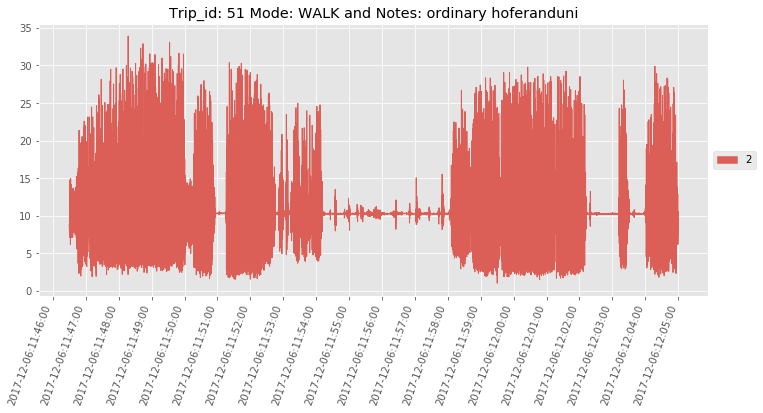

In [122]:
mode = trips_unpacked[selected_trip]["annotation"]["mode"][0]
notes = trips_unpacked[selected_trip]["annotation"]["notes"][0]

fig, ax = plt.subplots(figsize=(15, 5))
ax.set_title("Trip_id: {} Mode: {} and Notes: {}".format(selected_trip, mode,notes))
plot_timeseries_clustering(acceleration_data_trip["time"],acceleration_data_trip["total"], acceleration_data_trip["cluster_labels"], ax=ax)

## Plot the distribution of modes to cluster label for all trips

From this we can see that it the clustering is not distinct between "WALK" and "TRAM"

In [123]:
def get_distribution_of_cluster_labels_for(target, distance_matrix):
    column_names = ["count_cluster_"+str(i) for i in np.sort(distance_matrix["cluster_labels"].unique())]
    column_names += [target]
    dist_df = pd.DataFrame(columns=column_names)
    # Collect cluster counts per mode
    for index, target_value in enumerate(distance_matrix[target].unique()):
        distance_per_target_value = distance_matrix[distance_matrix[target]==target_value]
        dist_df.loc[index,target]=target_value
        cluster_label_dist = distance_per_target_value.groupby("cluster_labels").count()[target]
        for cluster_id, label_count in cluster_label_dist.iteritems():
                dist_df.loc[index,"count_cluster_"+str(cluster_id)]=label_count

        dist_df.fillna(0,inplace=True)

    return dist_df

mode_dist_df = get_distribution_of_cluster_labels_for("mode", euclidean_distances)
mode_dist_df

,count_cluster_0,count_cluster_1,count_cluster_2,count_cluster_3,mode
0,19.0,136.0,266.0,23.0,METRO
1,115.0,214.0,312.0,48.0,WALK
2,142.0,178.0,248.0,11.0,TRAM


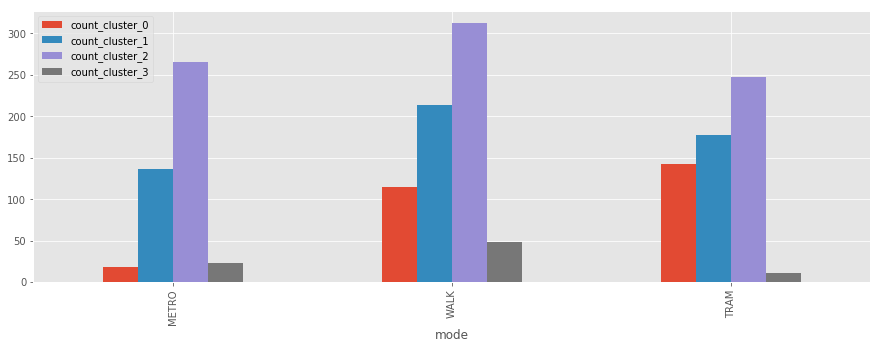

In [124]:
mode_dist_df.set_index("mode").plot(kind="bar",figsize=(15,5));

## Plot distribution of cluster labels for scripted and tokens

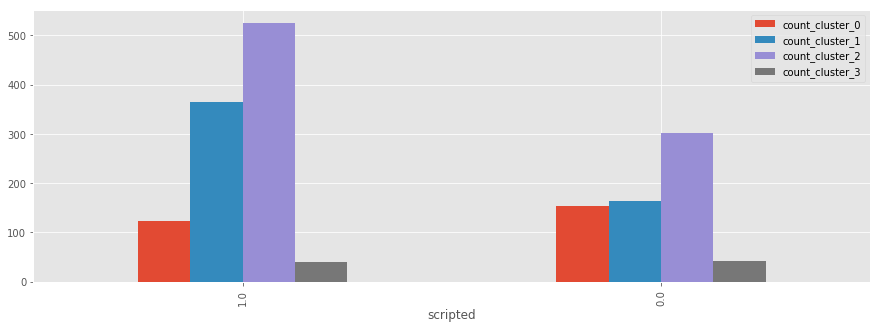

In [125]:
scripted_dist_df = get_distribution_of_cluster_labels_for("scripted", euclidean_distances)
scripted_dist_df.set_index("scripted").plot(kind="bar",figsize=(15,5));

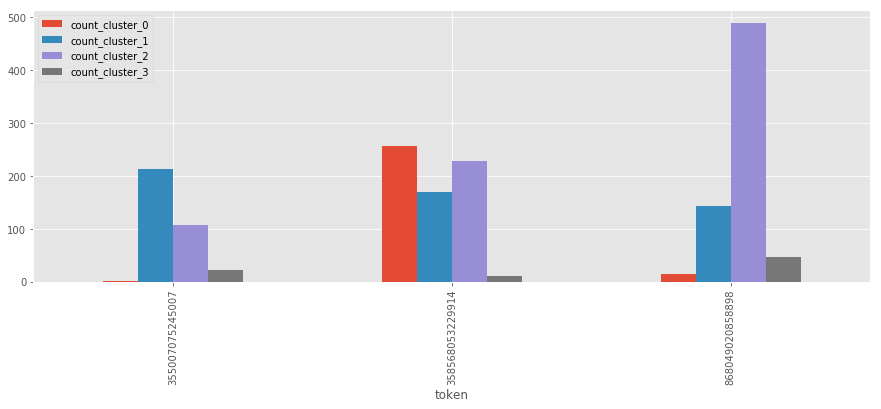

In [126]:
token_dist_df = get_distribution_of_cluster_labels_for("token", euclidean_distances)
token_dist_df.set_index("token").plot(kind="bar",figsize=(15,5));

## Plot all trips with their clustering labels

Produce this plot more conveniently by writing:

C:\Users\Lukas\.conda\envs\Tensorflow\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


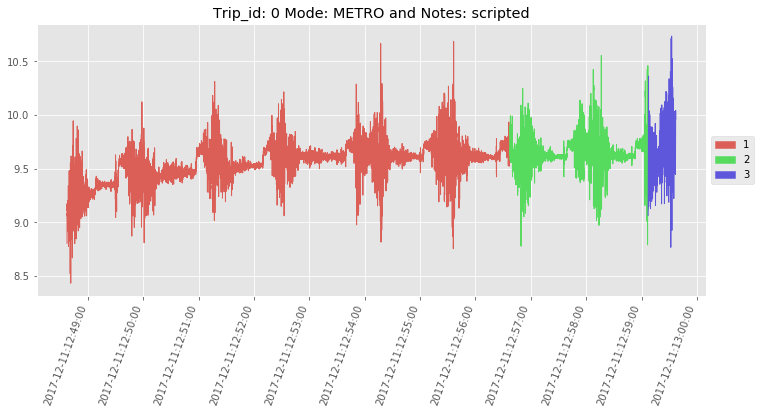

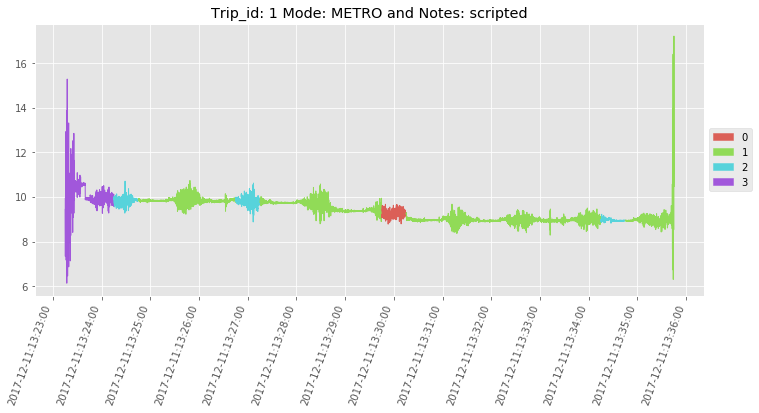

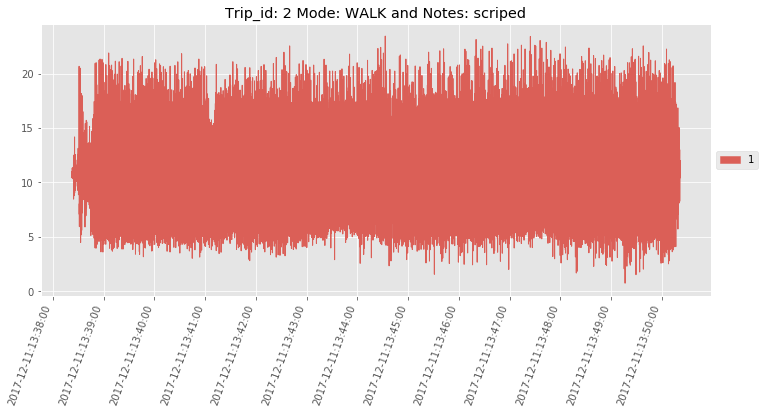

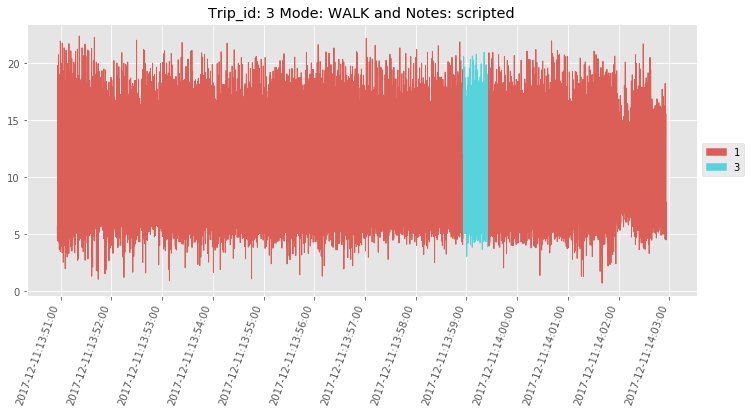

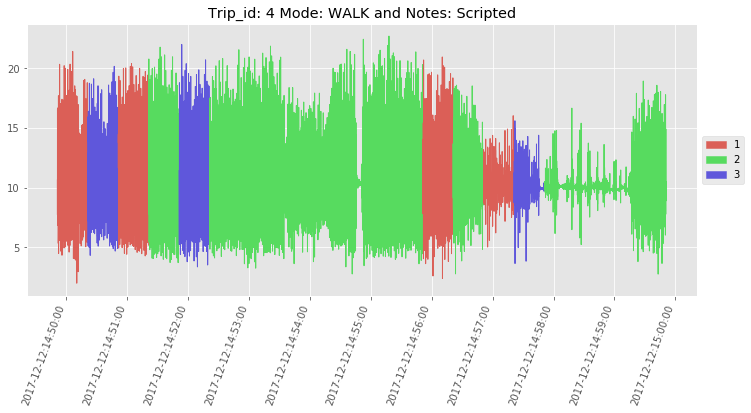

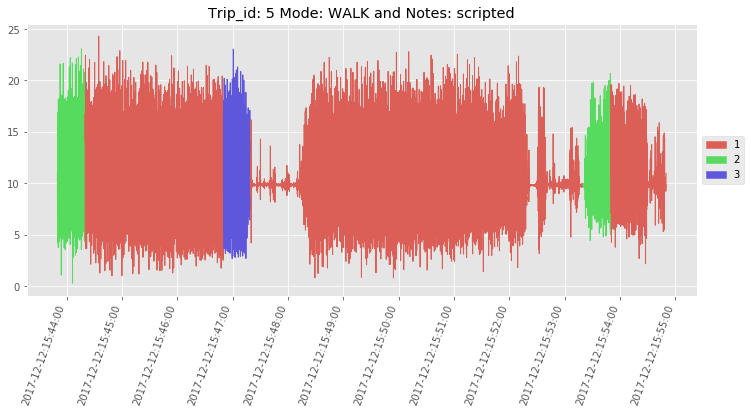

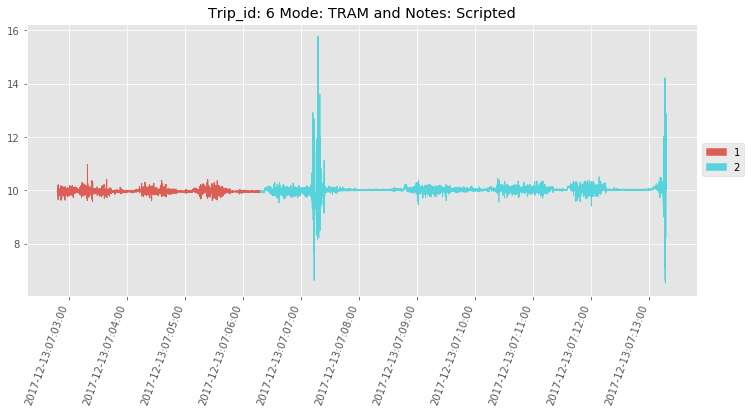

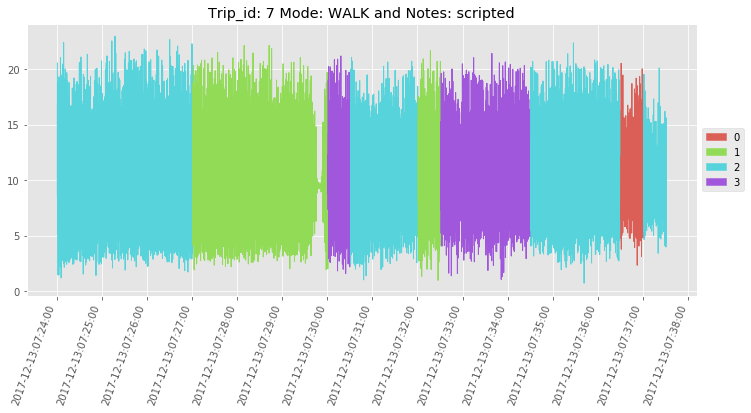

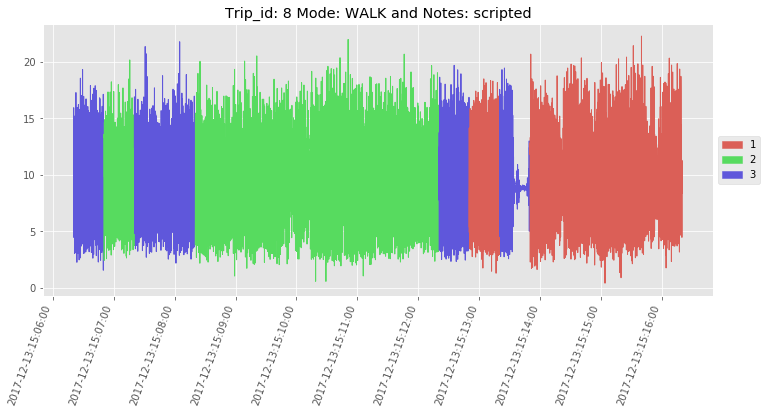

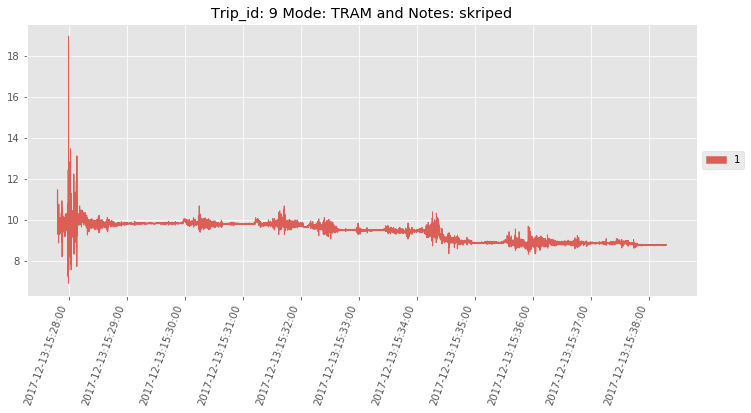

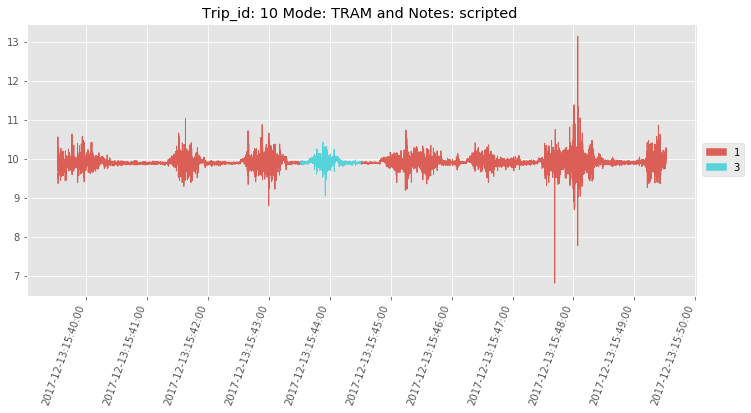

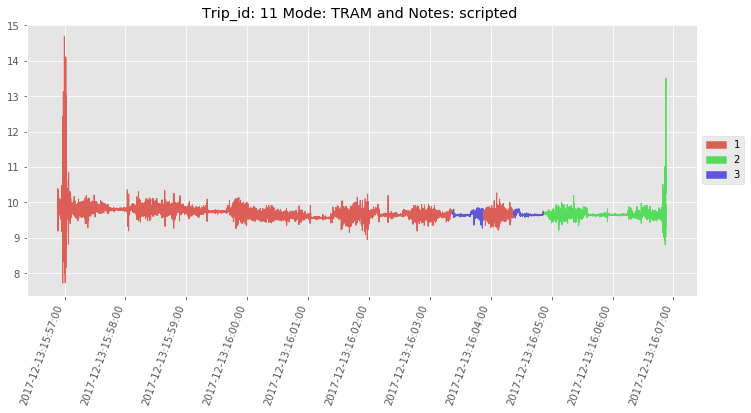

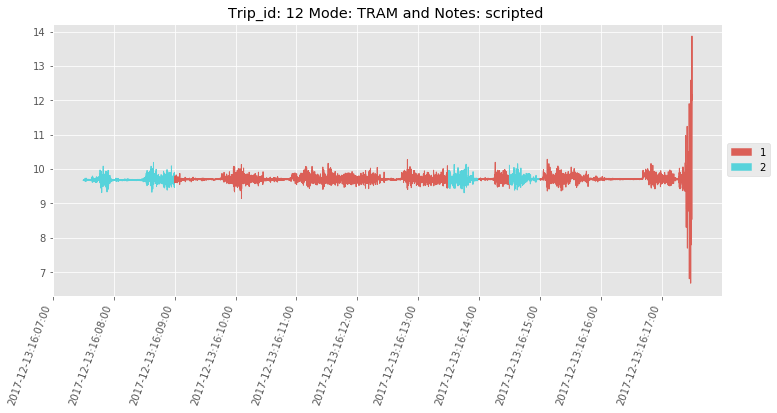

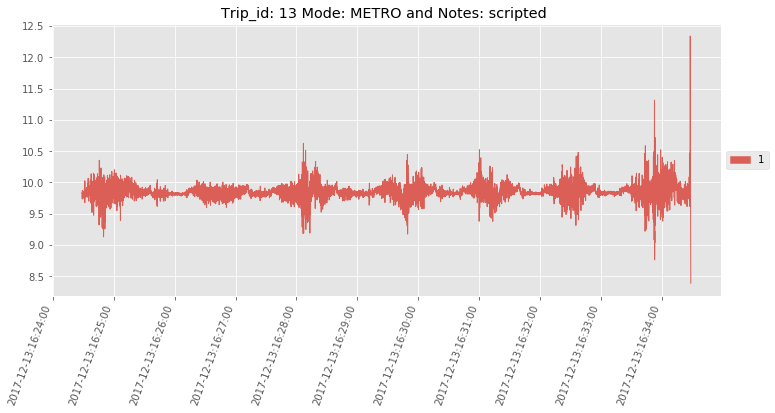

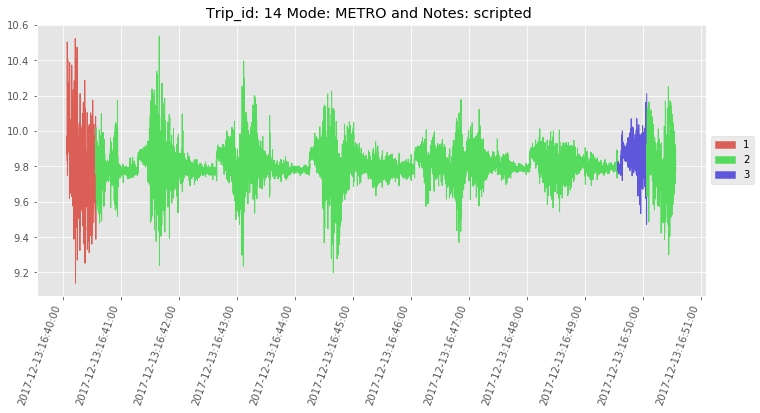

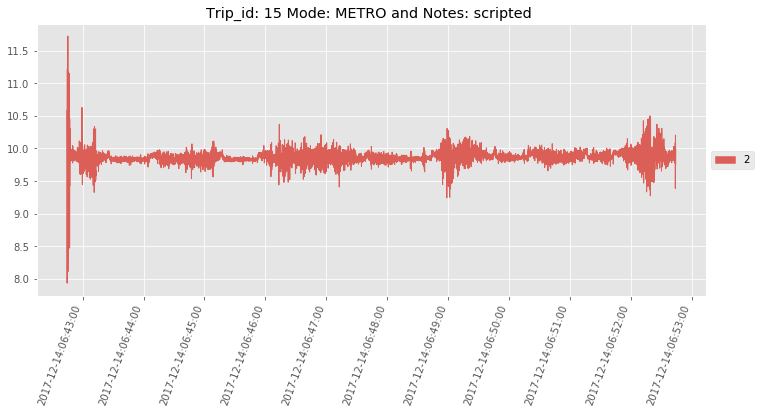

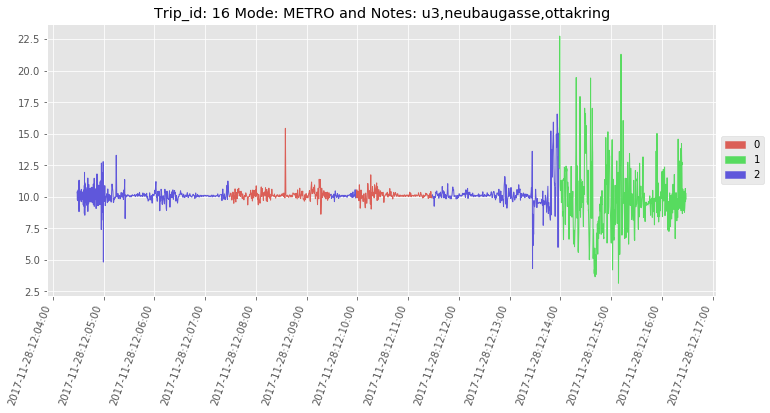

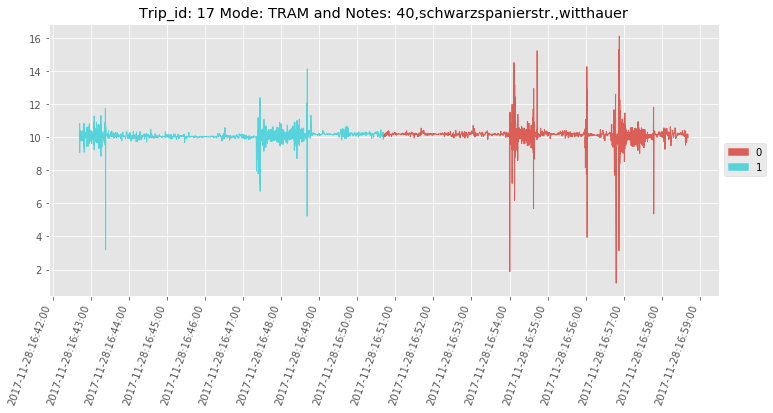

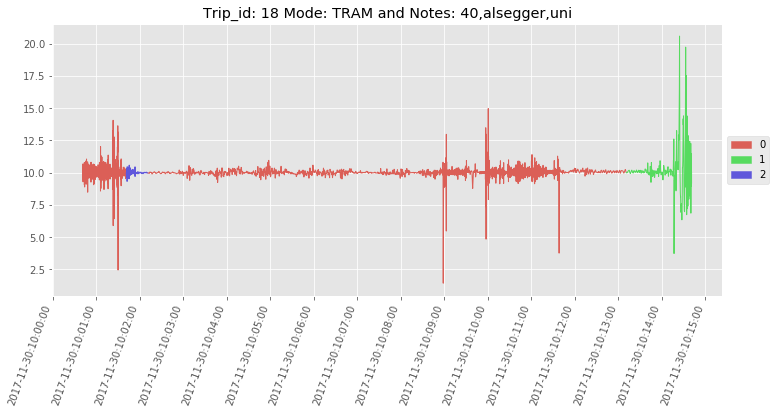

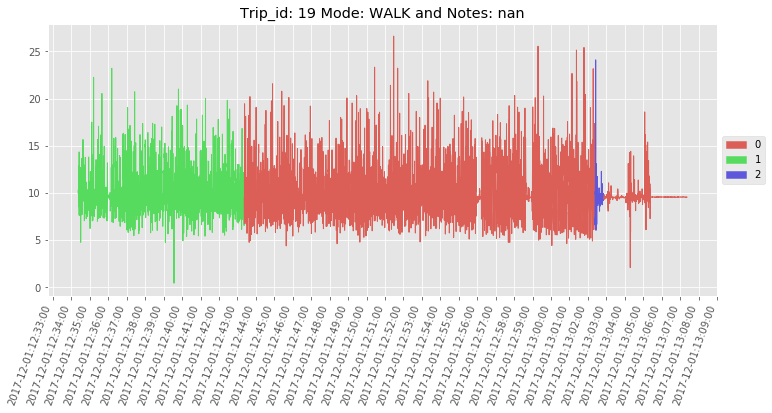

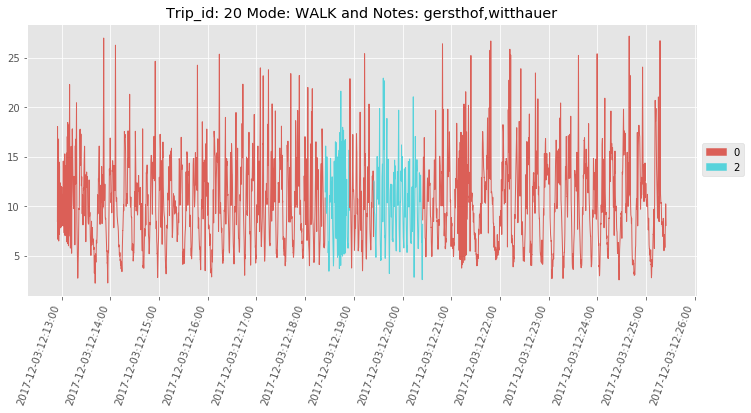

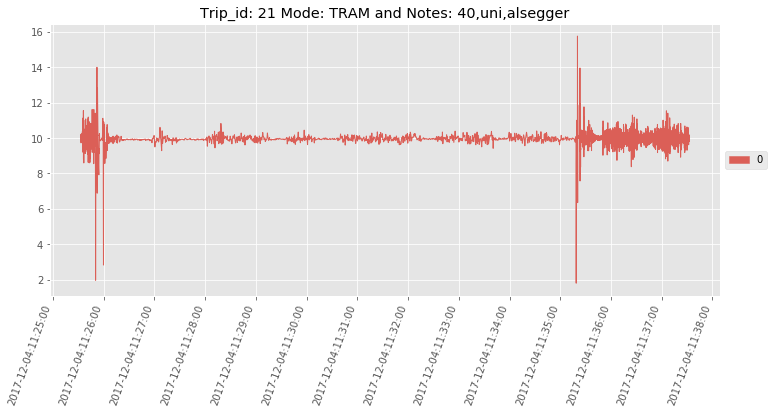

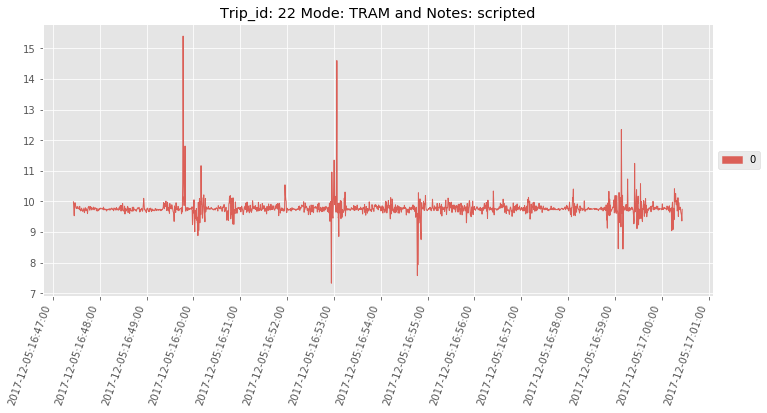

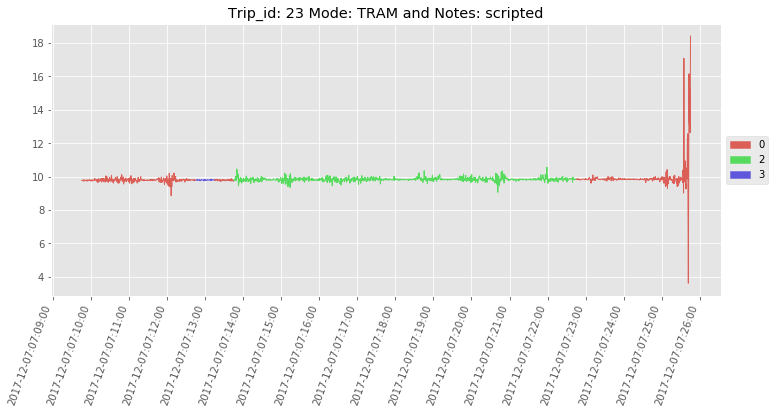

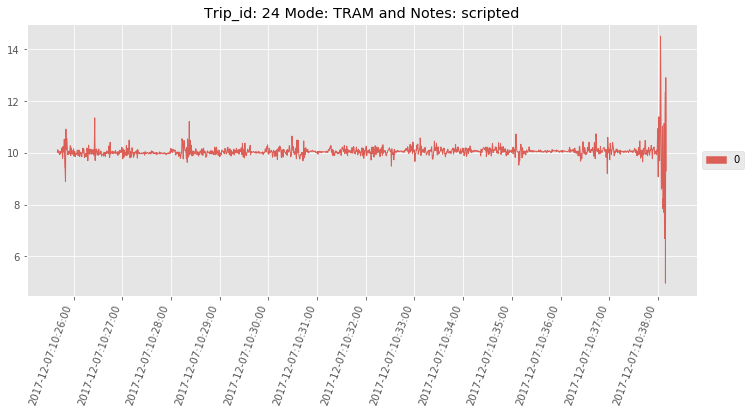

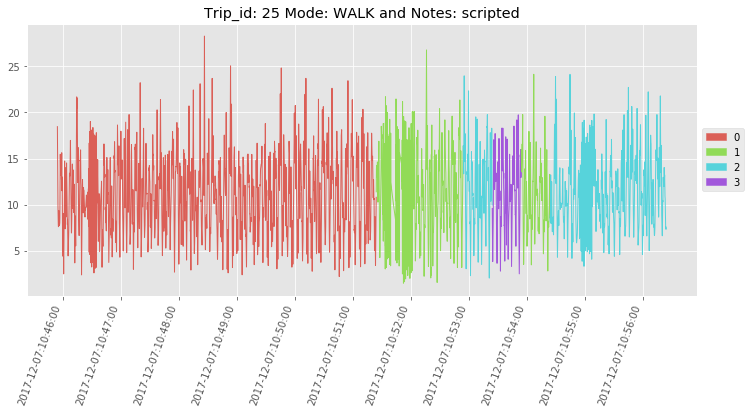

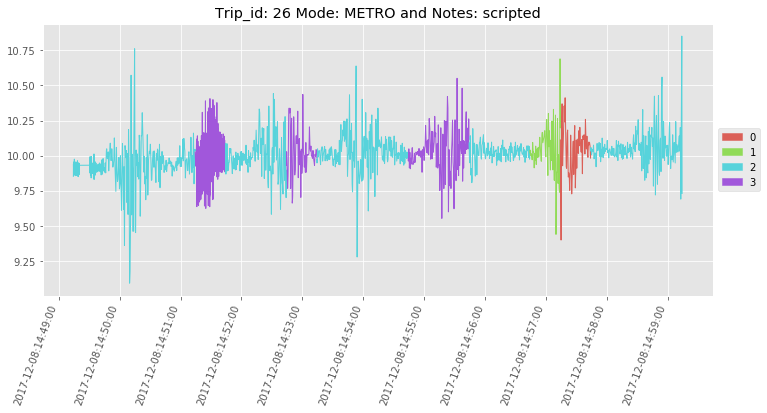

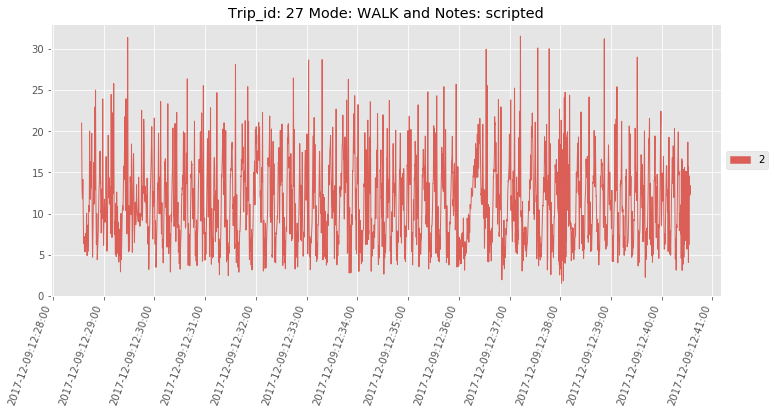

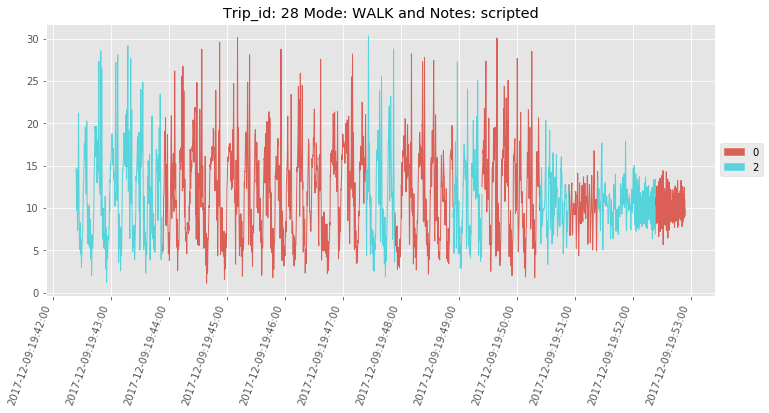

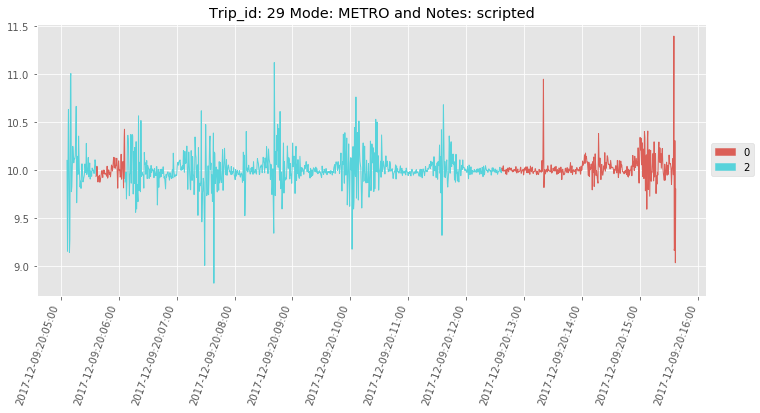

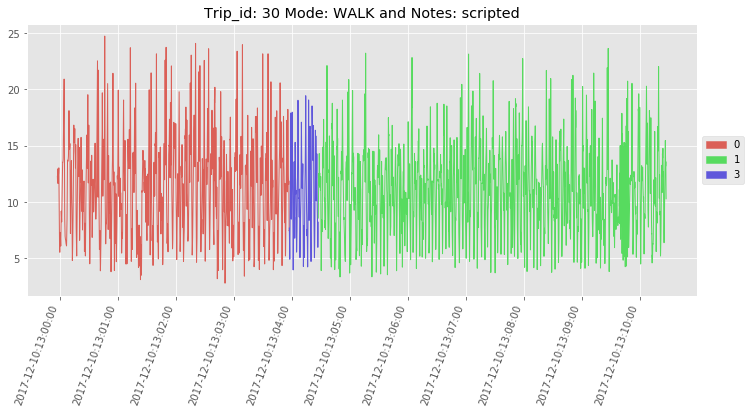

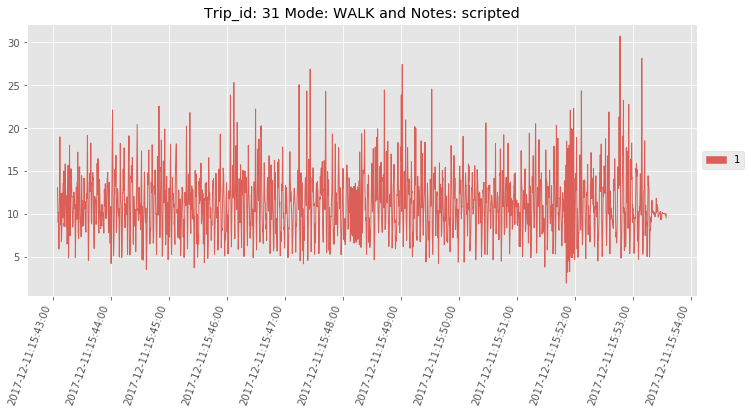

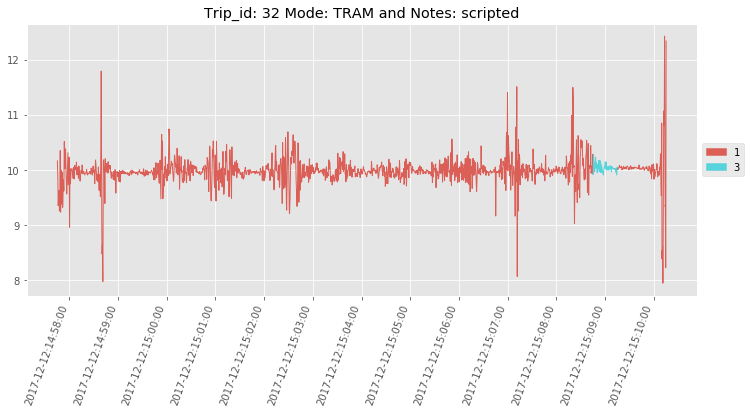

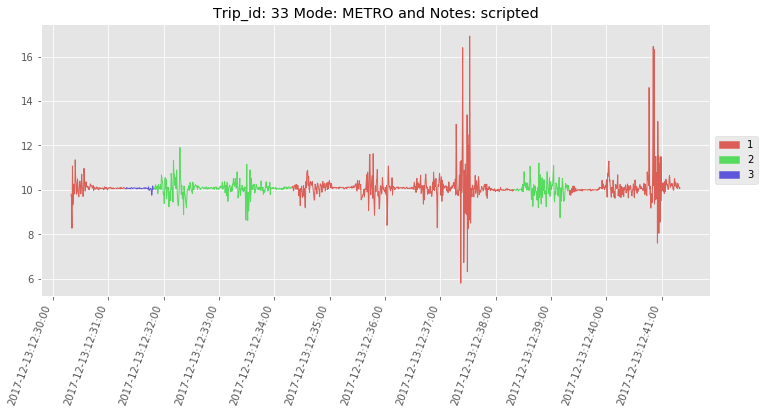

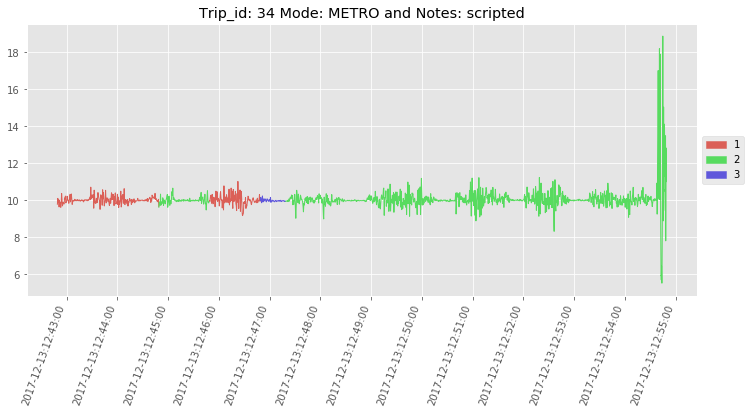

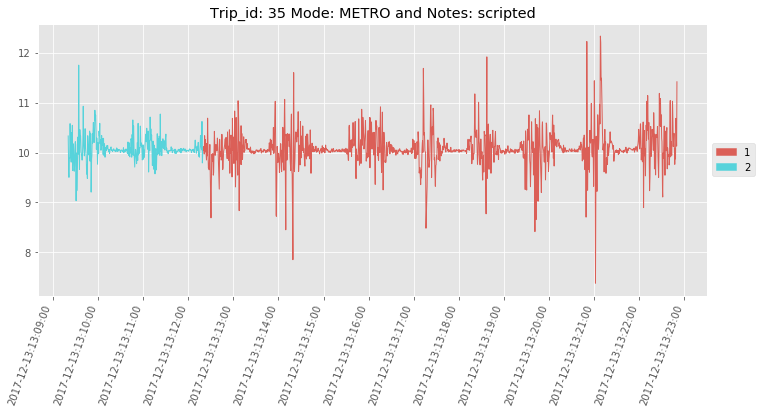

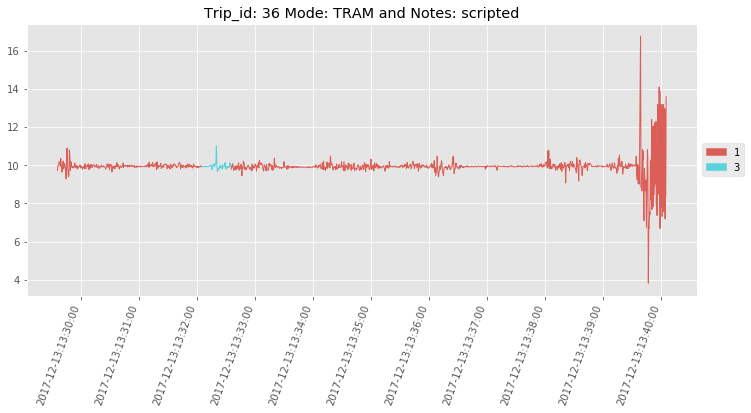

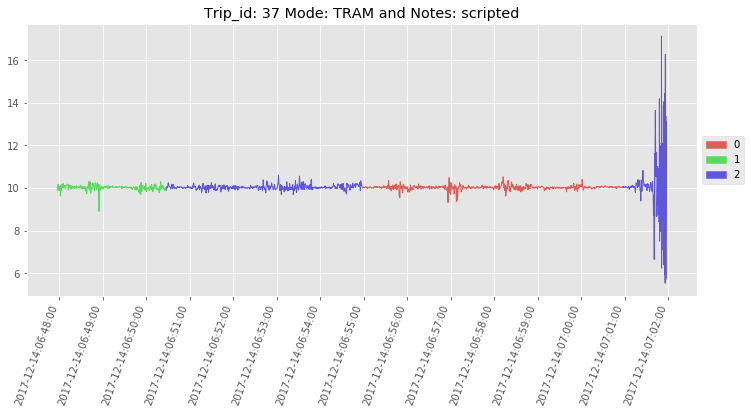

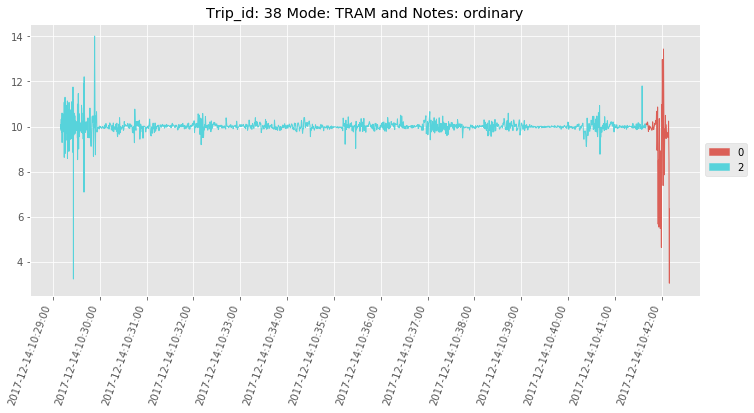

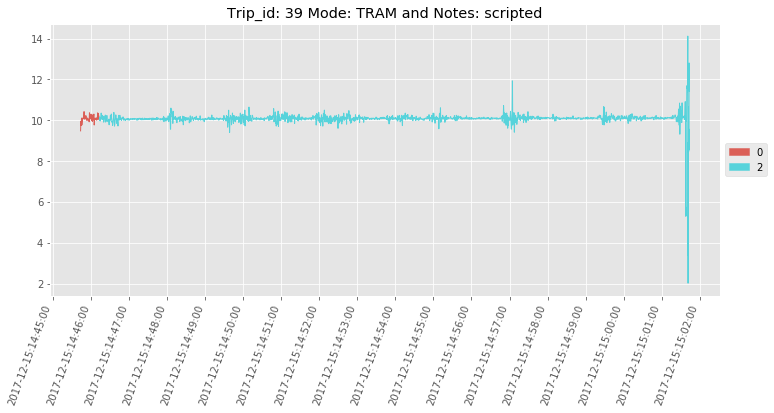

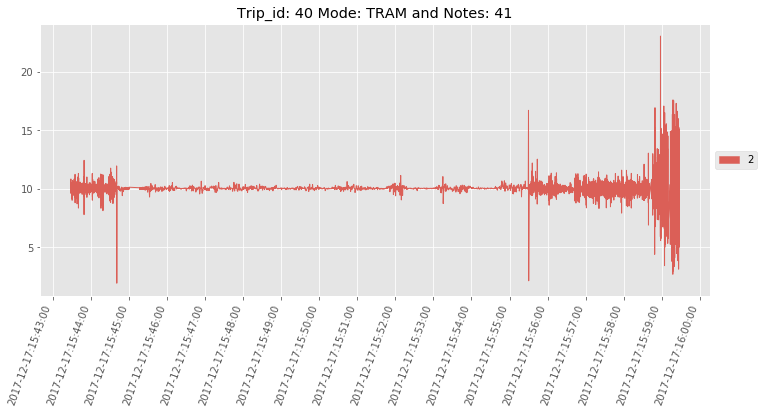

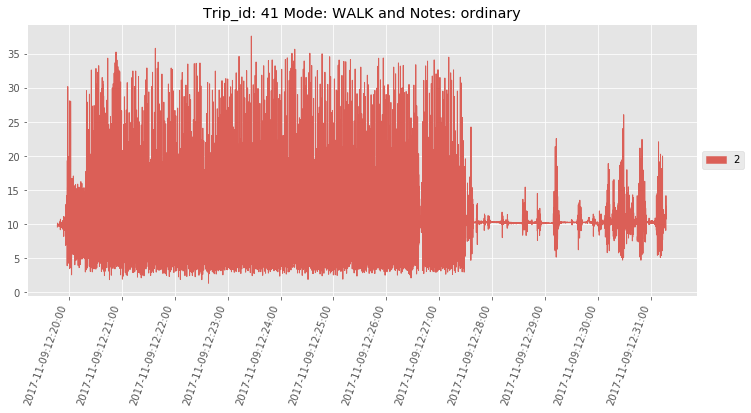

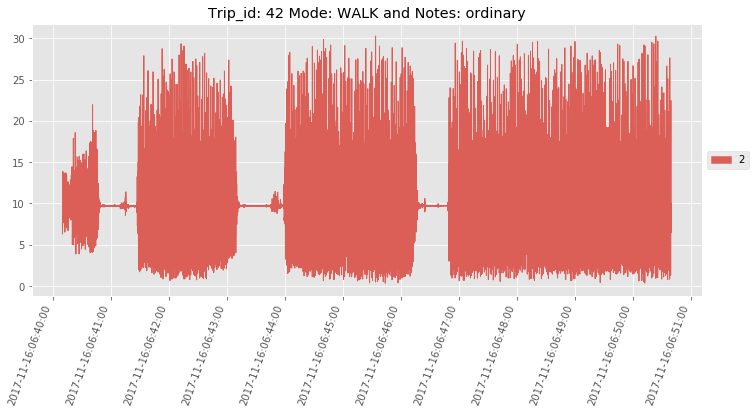

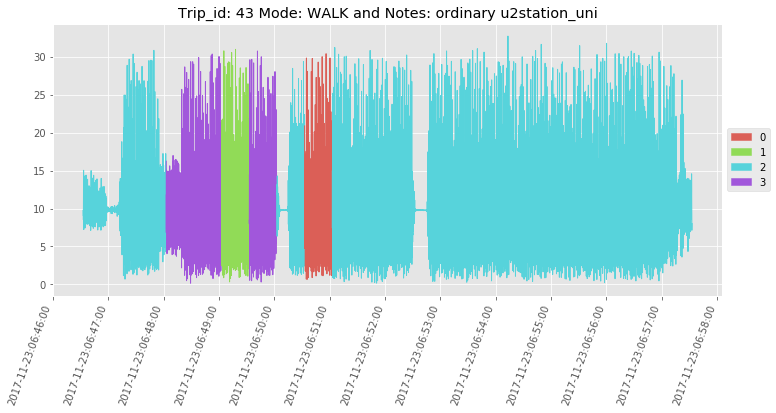

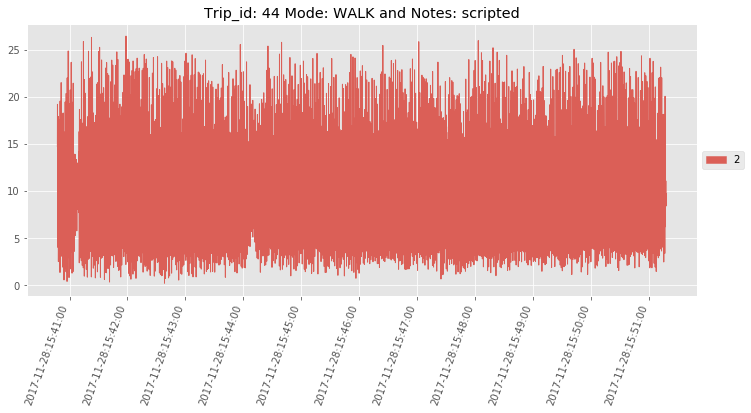

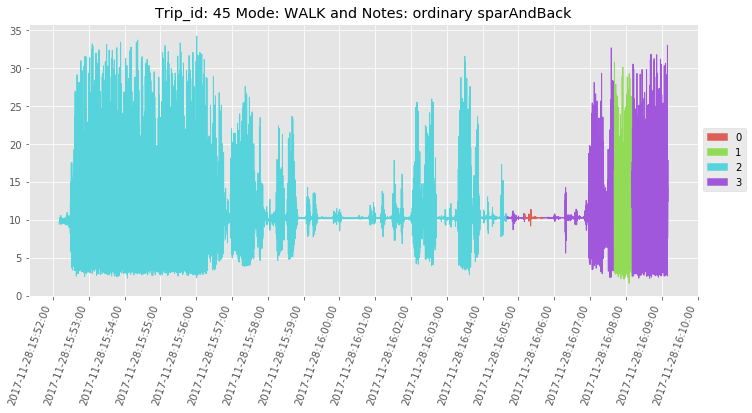

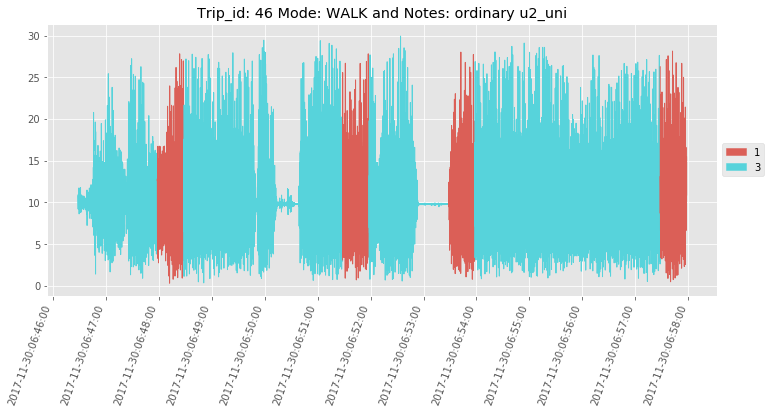

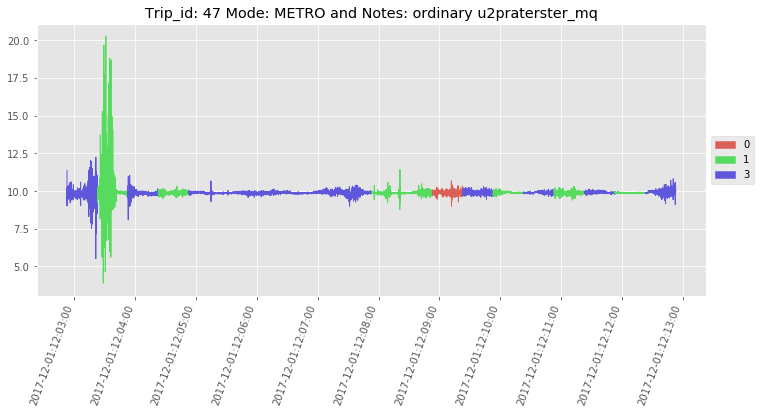

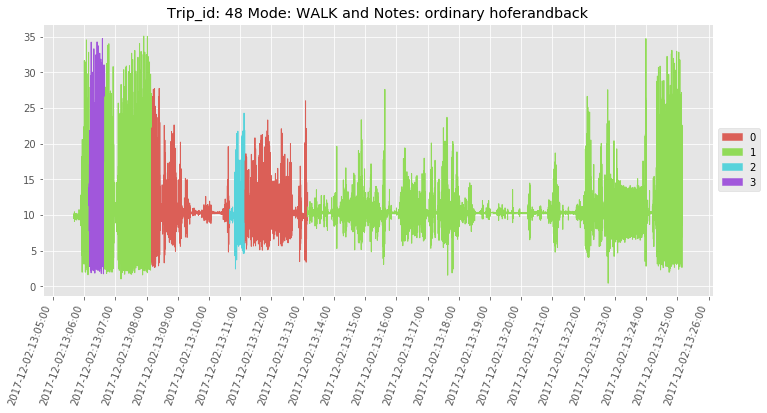

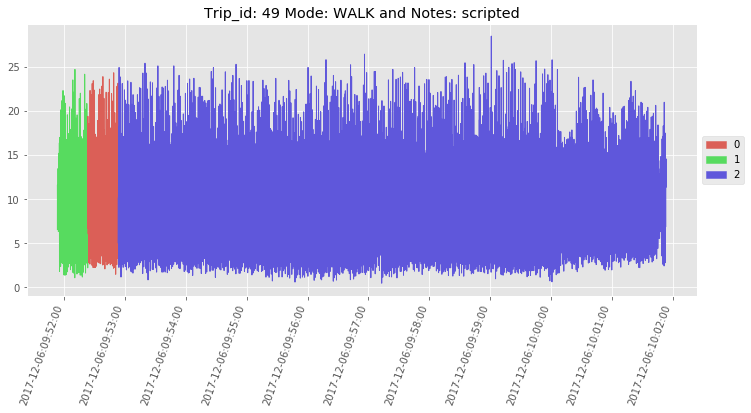

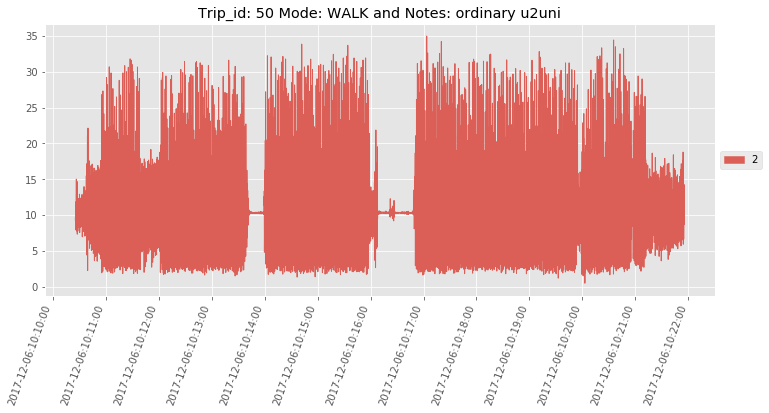

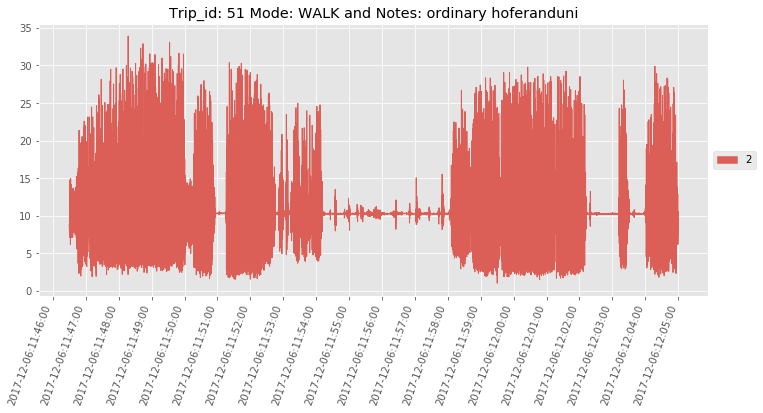

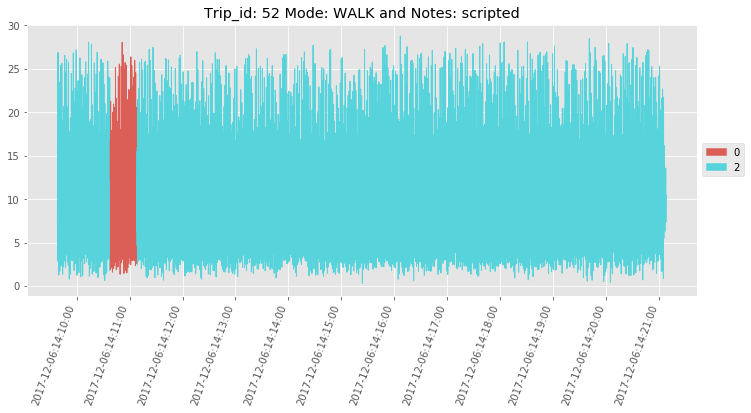

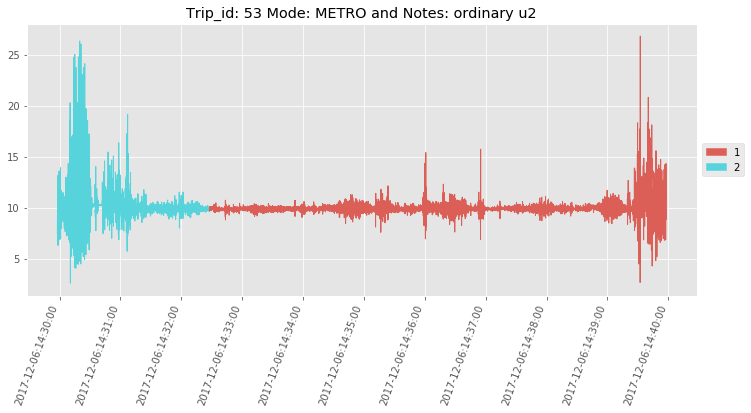

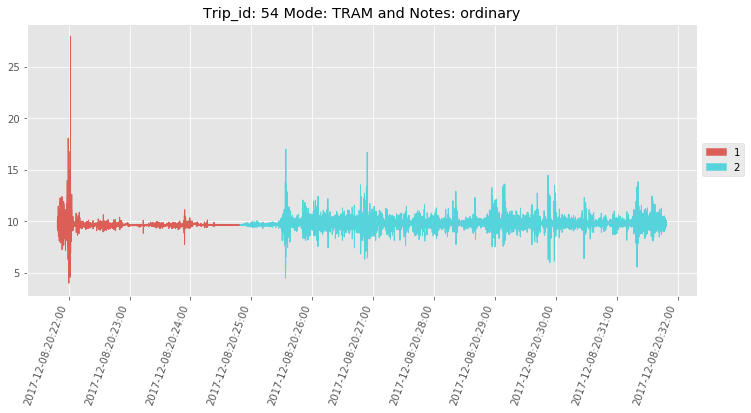

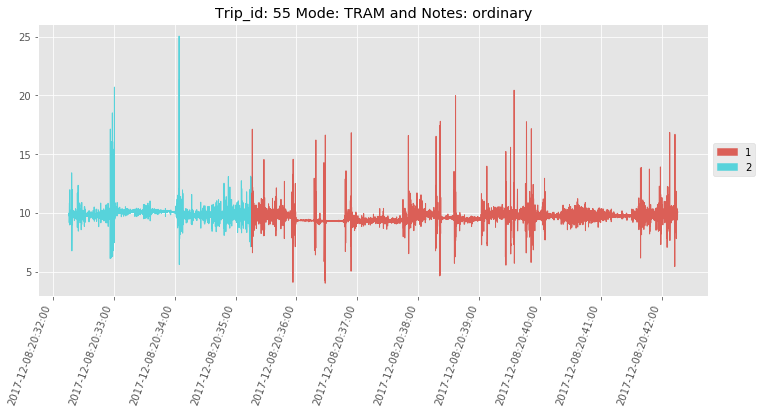

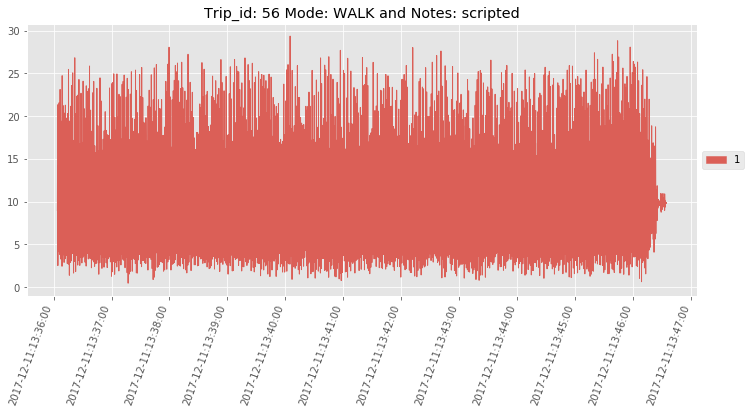

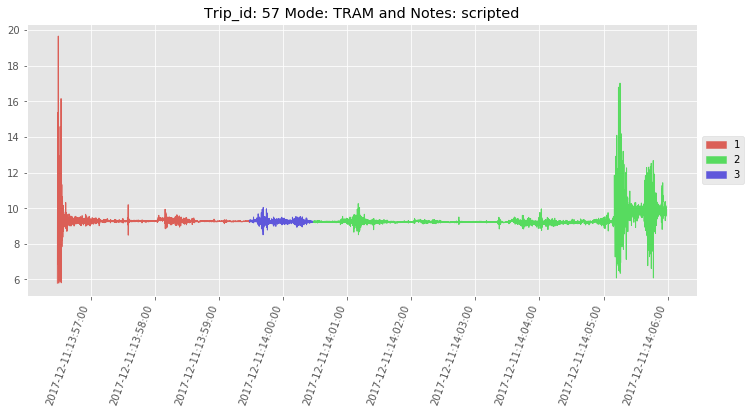

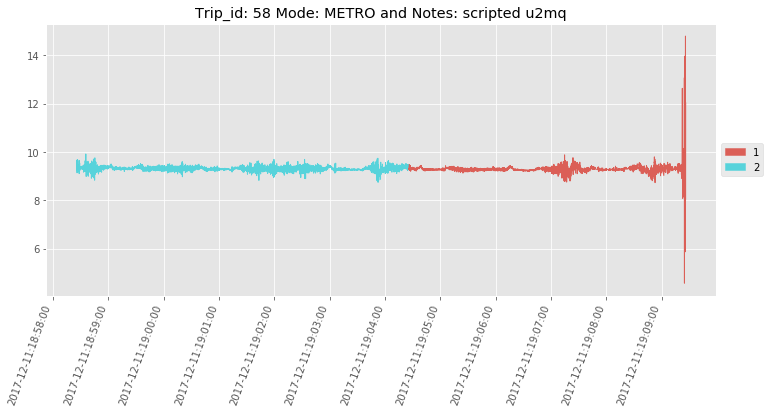

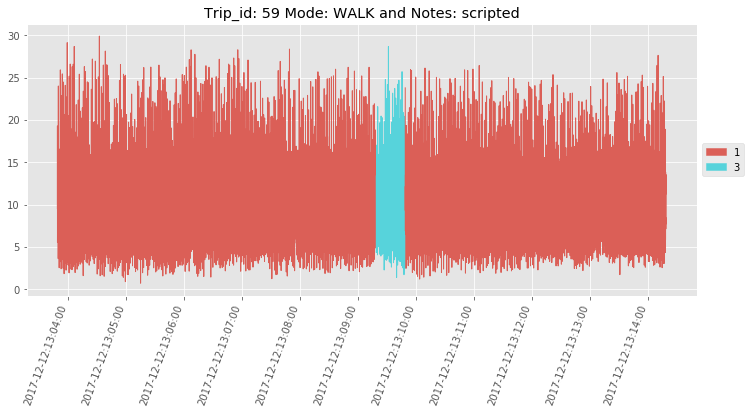

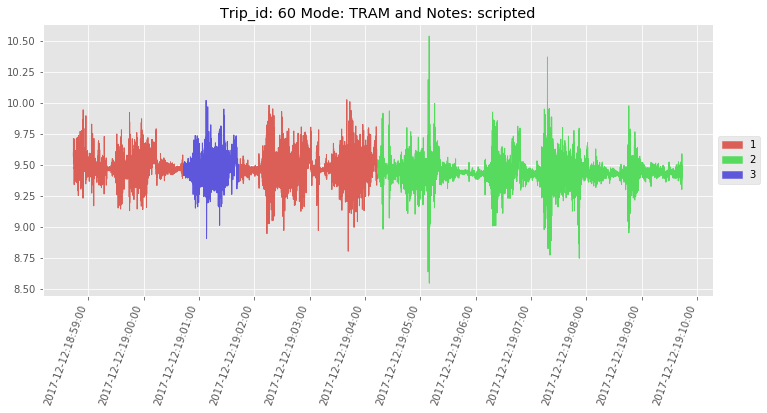

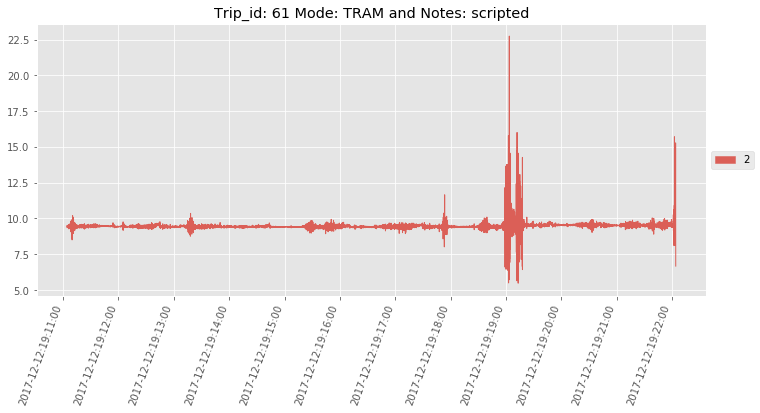

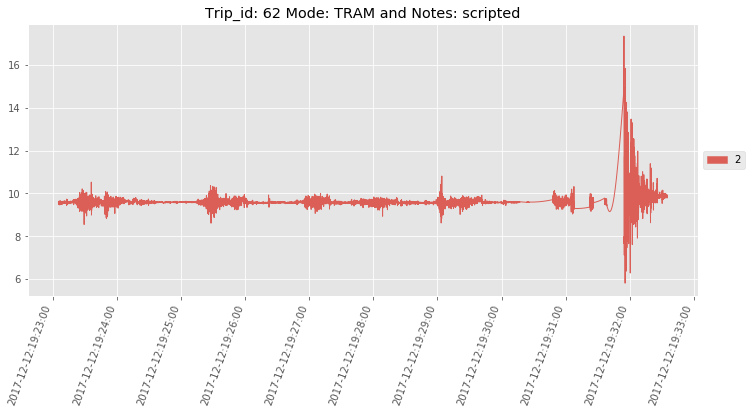

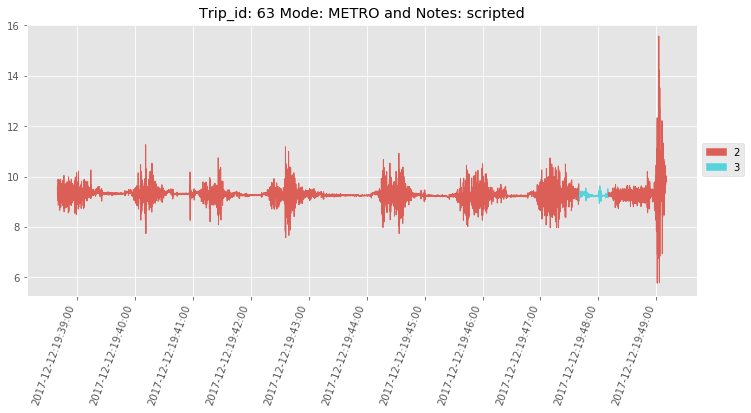

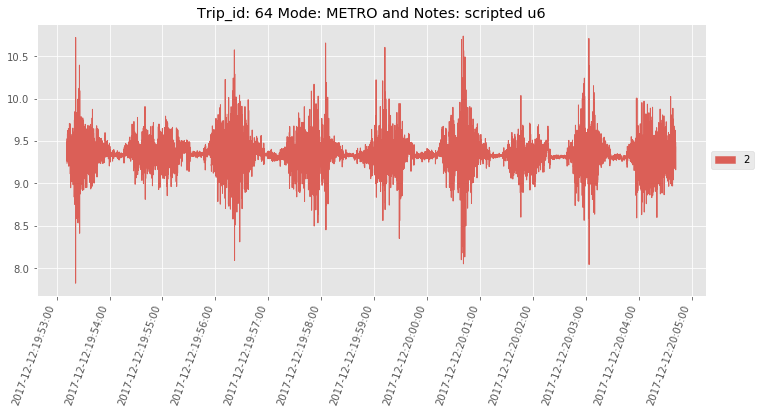

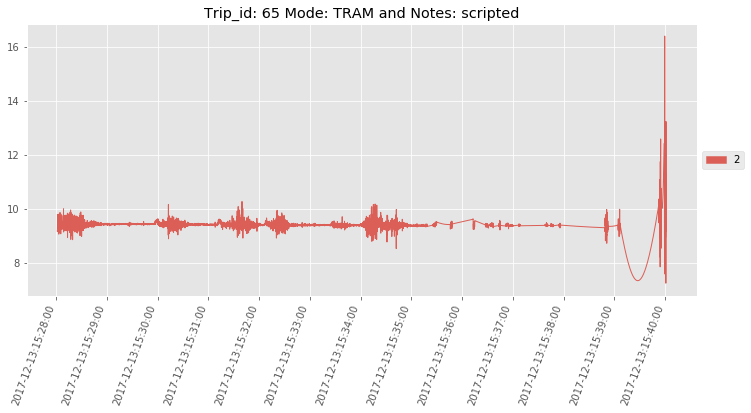

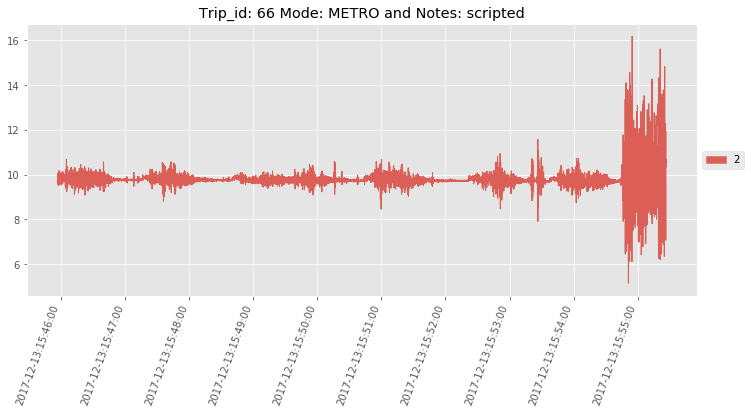

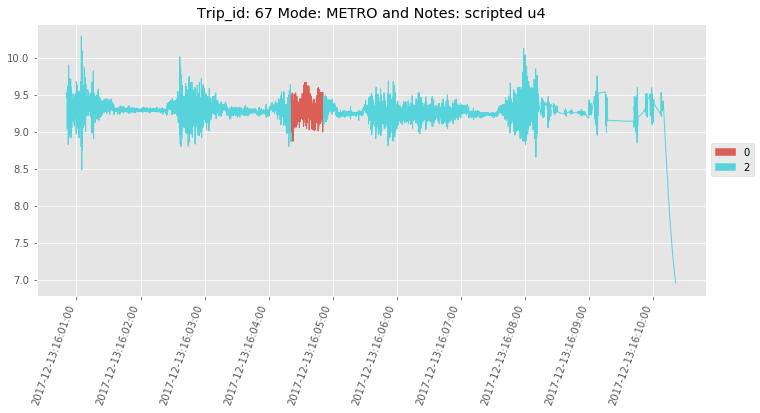

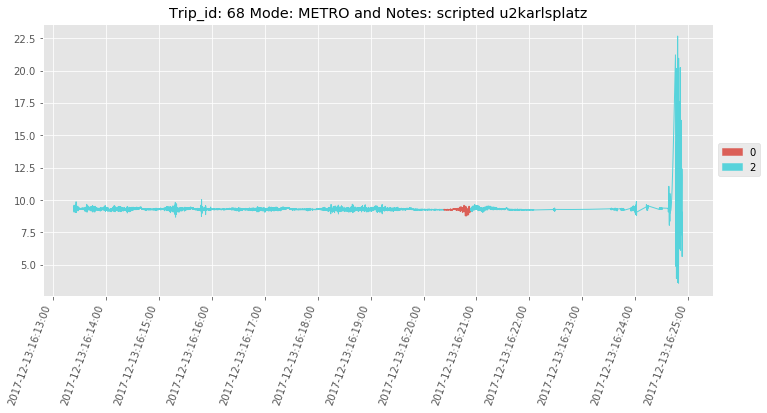

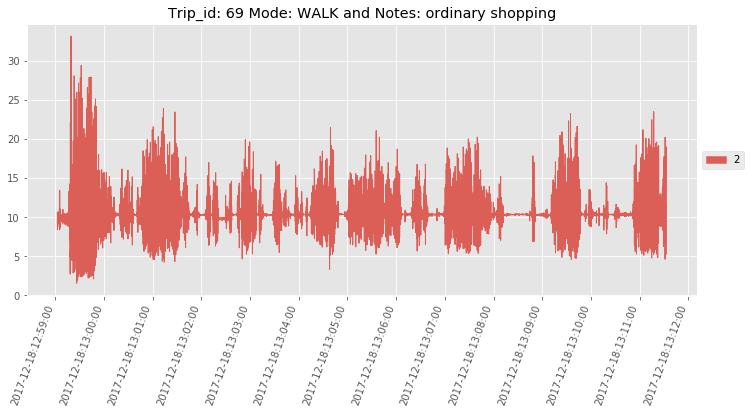

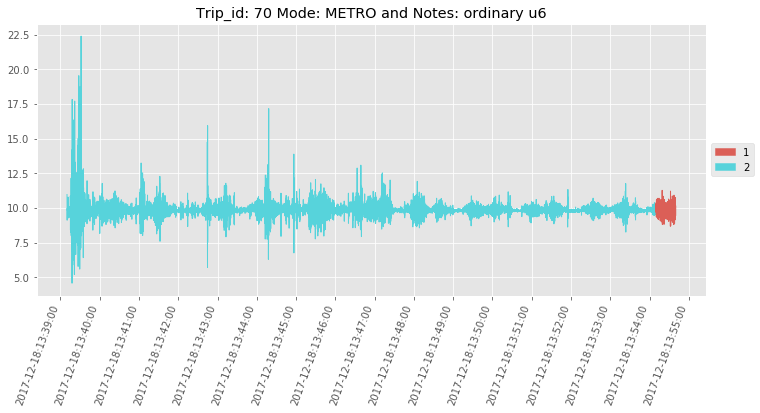

In [127]:

trip_ids = [i for i in euclidean_distances.trip_id.unique()]

for trip_id in trip_ids:
    time, total, labels = \
        get_plot_timeseries_clustering_variables(euclidean_distances,
                                                 trips_unpacked, 
                                                 trip_id, 
                                                 sensor_type="acceleration")


    mode = trips_unpacked[trip_id]["annotation"]["mode"][0]
    notes = trips_unpacked[trip_id]["annotation"]["notes"][0]

    title_format = "Trip_id: {} Mode: {} and Notes: {}"

    fig, ax = plt.subplots(figsize=(15, 5))
    ax.set_title(title_format.format(trip_id,mode,notes))
    plot_timeseries_clustering(time,total, labels, ax=ax)